In [ ]:
!pip install joypy
!pip install squarify
!pip install plotly

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
from statsmodels.graphics.mosaicplot import mosaic

from joypy import joyplot #!pip install joypy
import squarify # pip install squarify
import plotly.express as px # pip install plotly

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_1=pd.read_csv("/content/Egg_Production_2007_2012.csv")
df_2=pd.read_csv("/content/Milk_Production_2007_2012.csv")
df_1.rename(columns={'2007-08 (In lakh nos.)': '2007-08','2008-09 (In lakh nos.)': '2008-09','2009-10 (In lakh nos.)': '2009-10','2010-11 (In lakh nos.)': '2010-11','2011-12 (In lakh nos.)': '2011-12'}, inplace=True)

In [ ]:
df1 = (pd.concat([df_1, df_2], axis=1, keys=('Eggs','Milk'))
         .swaplevel(1,0, axis=1)
         .sort_index(axis=1, level=1))
del df1["States/Uts"]
column=df_1["States/Uts"]
df1["States/Uts"]=column
df1=df1.set_index('States/Uts')
df1=df1.stack()
df1 = df1.rename_axis(['States/Uts','Item'])
print(df1)
df1 = df1.drop("Total")
print(df1)


                        2007-08  2008-09  ...  2011-12             States
States/Uts        Item                    ...                            
Andhra Pradesh    Eggs   175884   183446  ...   212103                NaN
                  Milk     8925     9570  ...    12088     Andhra Pradesh
Arunachal Pradesh Eggs      394      361  ...      419                NaN
                  Milk       32       24  ...       22  Arunachal Pradesh
Assam             Eggs     4910     4659  ...     4705                NaN
...                         ...      ...  ...      ...                ...
Lakshadweep       Milk        2        2  ...        2        Lakshadweep
Puducherry        Eggs      137      112  ...      116                NaN
                  Milk       47       46  ...       45         Puducherry
Total             Eggs   535649   555624  ...   664499                NaN
                  Milk   107934   112183  ...   127904          All India

[72 rows x 6 columns]
               

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


## Mossaic Plot

In [ ]:
df1_total=df1["Total"].sort_values()
df1_total=df1_total[0:8]
dic= df1_total.to_dict()
labelizer = lambda k:dic[k]
mosaic(df1_total,labelizer =labelizer,gap=0.01)
plt.xticks(rotation=90)
plt.show()

## Parallel sets

In [ ]:
data1 = df.set_index(['States/Uts',"Item"])
data1=data1.stack()
data1=data1.reset_index()
data1.columns=["States/Uts","Item","Year","Measure"]
data1

In [ ]:
fig = px.parallel_categories(data1,dimensions=['States/Uts','Item',"Year"],color="Measure")
fig.show()

## Heart Data Tasks

 Correlogram Problem

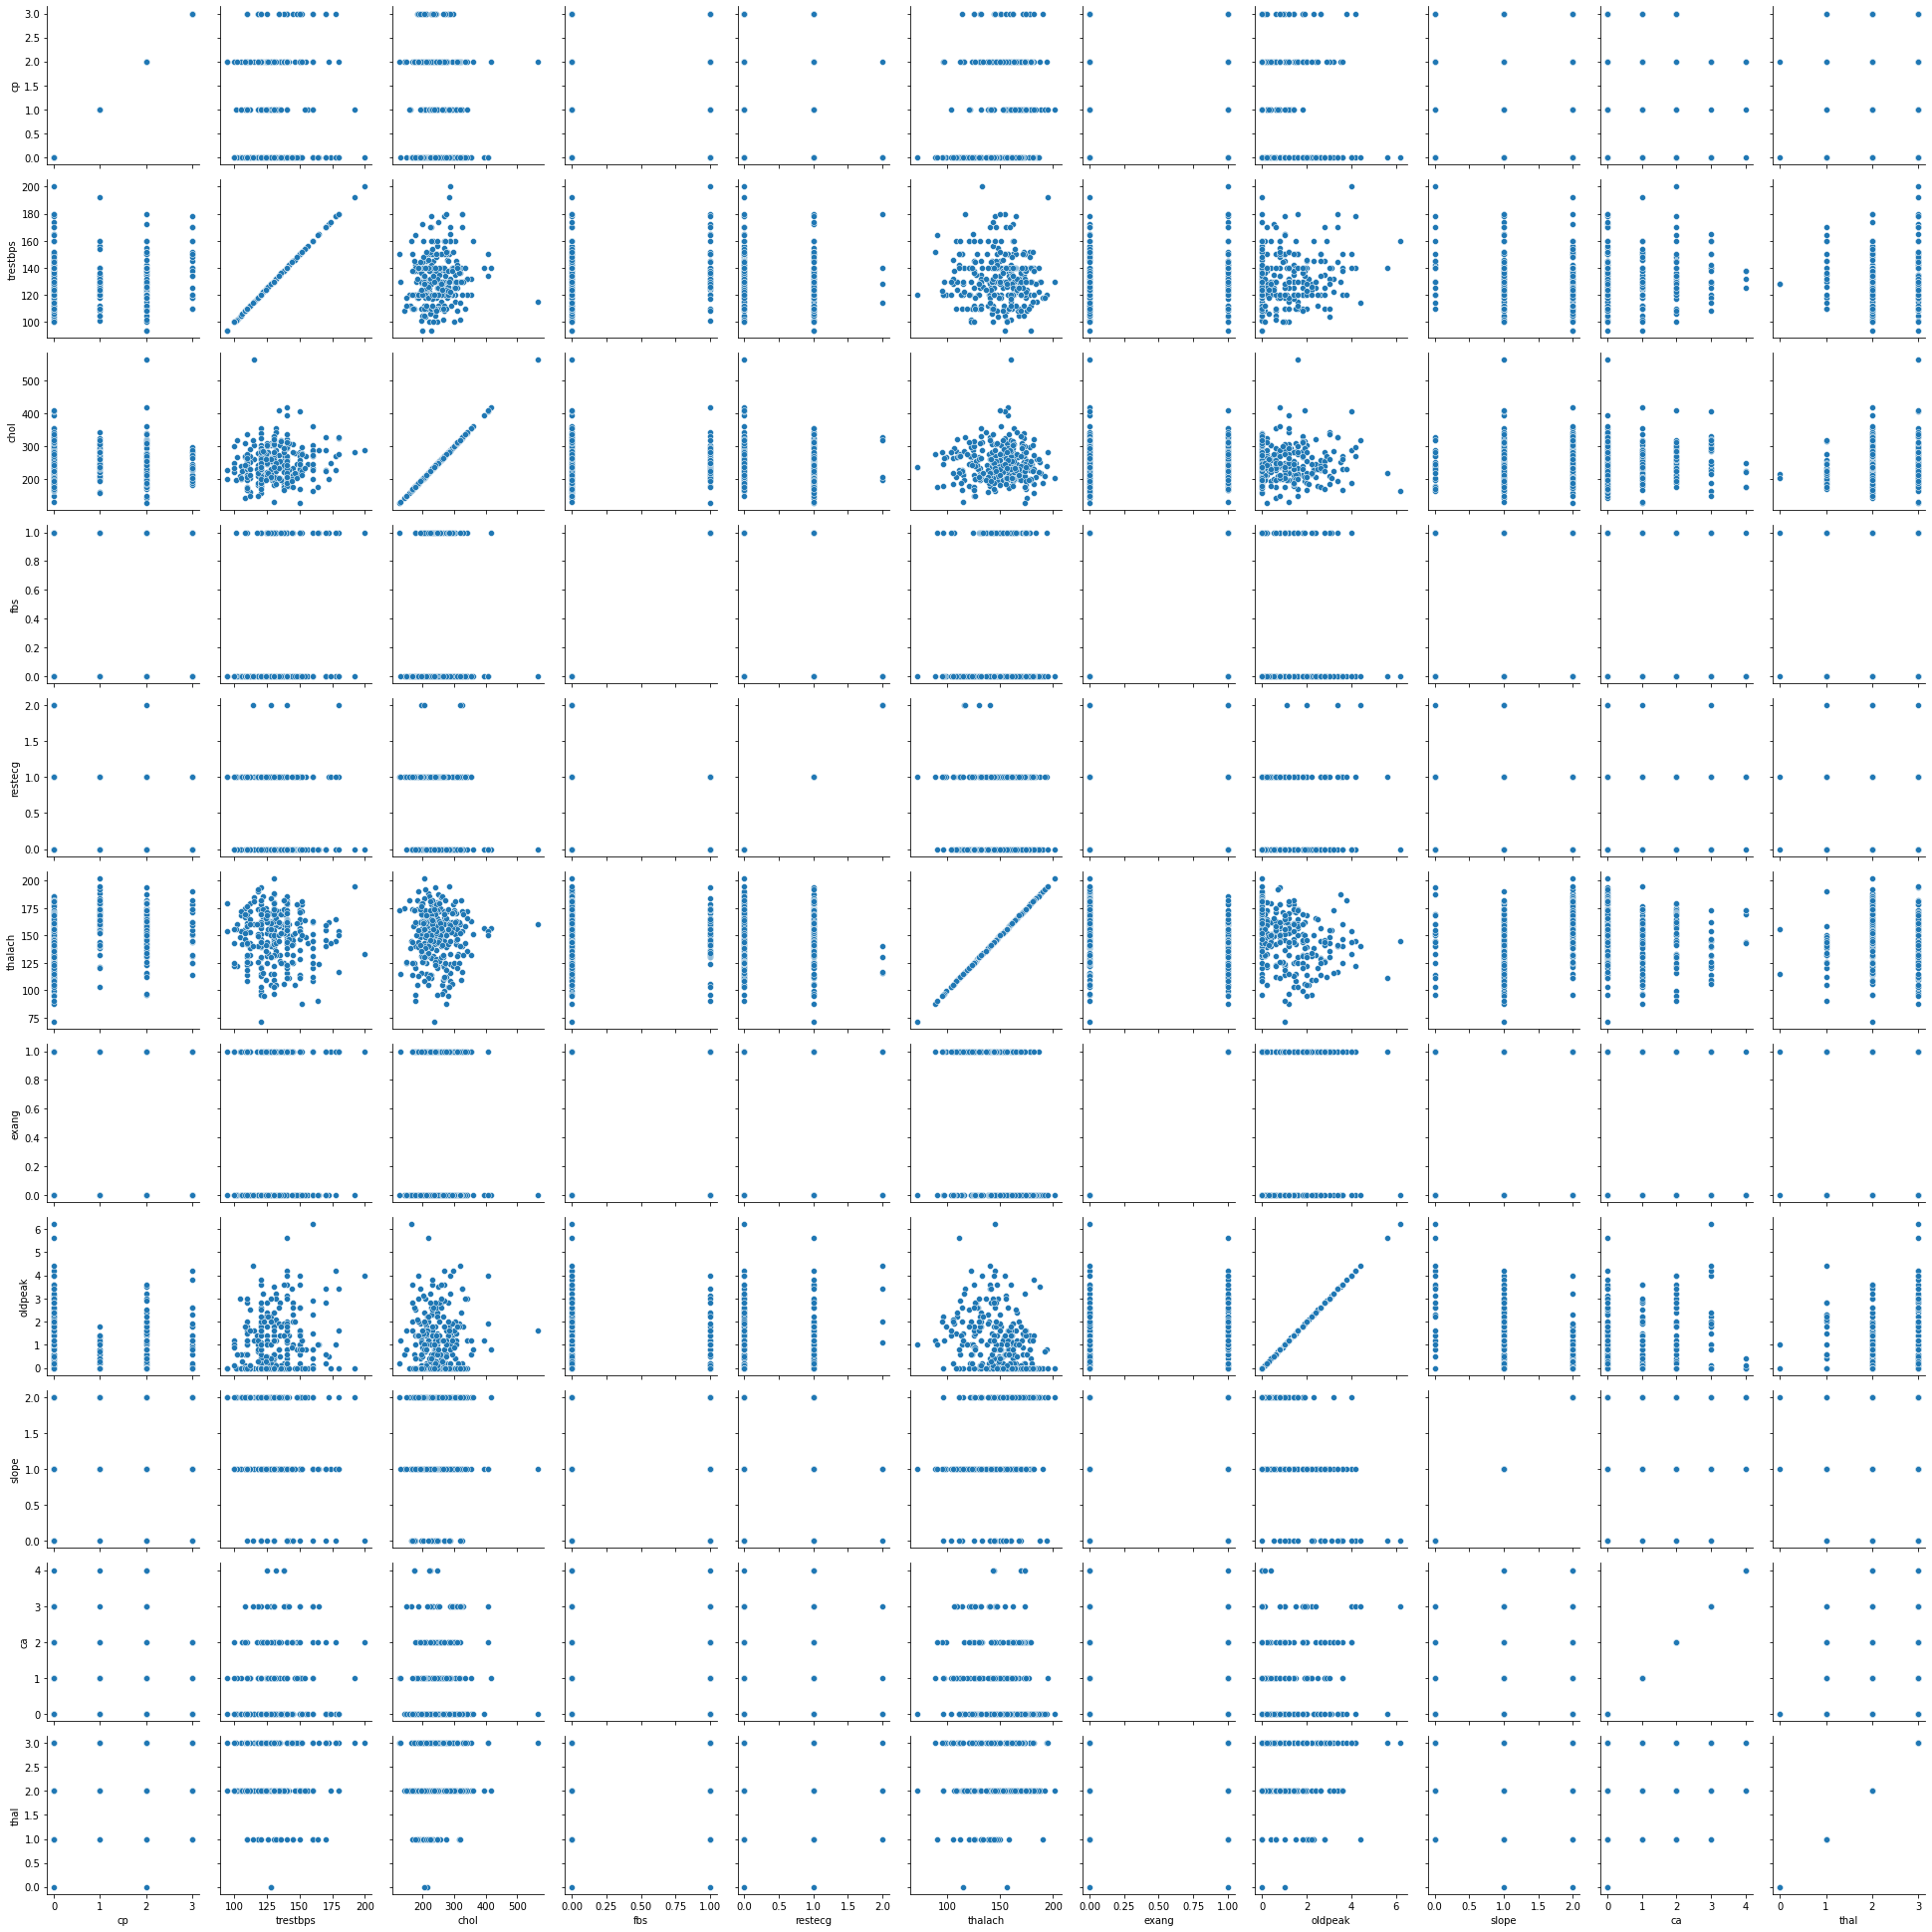

In [ ]:
df_3=pd.read_csv("/content/heart.csv")
clean_data=df_3[["cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]
g = sns.PairGrid(clean_data)
g.map(sns.scatterplot)

##Heat Map

Slop Chart

Text(0.0, 1.0, 'Change in field values')

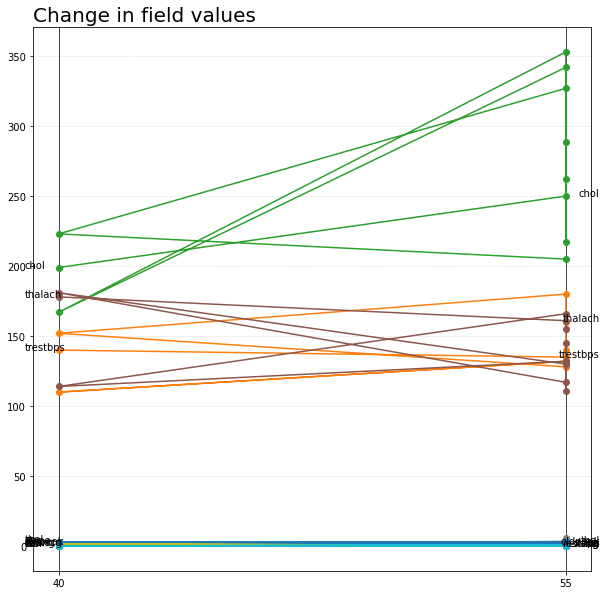

In [ ]:
feilds=["cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
data=df_3[df_3["age"].isin([40,55])]
fig, ax = plt.subplots(1, figsize=(10,10))
# grid
ax.xaxis.grid(color='black', linestyle='solid', which='both', alpha=0.9)
ax.yaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)
for i,nm in enumerate(feilds):
    plt.plot(data.age, data[nm],marker='o')
    plt.text(data.age.values[0]-1.0, data[nm].values[0], nm)
    plt.text(data.age.values[1]+1.0, data[nm].values[1], nm, ha='right')
plt.xticks([40, 55])
plt.title("Change in field values", loc='left', fontsize=20)